In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading Ecobici trips data from March 2023
data = pd.read_csv('2023-05.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945163 entries, 0 to 945162
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Genero_Usuario         945162 non-null  object 
 1   Edad_Usuario           945162 non-null  float64
 2   Bici                   945163 non-null  int64  
 3   Ciclo_Estacion_Retiro  945163 non-null  object 
 4   Fecha_Retiro           945163 non-null  object 
 5   Hora_Retiro            945163 non-null  object 
 6   Ciclo_EstacionArribo   945163 non-null  object 
 7   Fecha Arribo           945163 non-null  object 
 8   Hora_Arribo            945163 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 64.9+ MB


In [4]:
data.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,29.0,7689680,409,30/04/2023,23:47:13.5490,372,01/05/2023,01:00:07.1390
1,F,26.0,4491841,409,30/04/2023,23:47:16.6410,372,01/05/2023,01:00:15.9590
2,M,53.0,8475519,078,30/04/2023,23:55:17.6240,170,01/05/2023,01:00:26.0450
3,F,44.0,8584393,054,30/04/2023,23:25:48.5580,020,01/05/2023,01:00:27.7460
4,M,23.0,6810659,196,30/04/2023,23:43:35.5340,064,01/05/2023,01:01:04.5280


In [5]:
# exploring this strange station "number": 271-272
data.loc[data.Ciclo_Estacion_Retiro=='271-272']

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
23,M,32.0,8527699,271-272,30/04/2023,23:48:54.1580,182,01/05/2023,01:04:48.2030
323,M,46.0,3832581,271-272,01/05/2023,06:42:43.6010,450,01/05/2023,07:46:07.4420
484,M,43.0,6928444,271-272,01/05/2023,07:15:36.4770,015,01/05/2023,08:26:27.7400
525,M,28.0,2377505,271-272,01/05/2023,07:31:29.7900,264-275,01/05/2023,08:33:06.8650
596,M,28.0,7276454,271-272,01/05/2023,07:31:11.9640,226,01/05/2023,08:45:11.3690
...,...,...,...,...,...,...,...,...,...
944212,M,32.0,5301064,271-272,31/05/2023,22:12:54.7580,271-272,31/05/2023,23:38:42.4090
944312,M,20.0,5706205,271-272,31/05/2023,22:30:40.1210,009,31/05/2023,23:44:39.6370
944955,M,23.0,5355201,271-272,31/05/2023,23:16:36.5950,103,01/06/2023,00:33:07.0880
945111,M,34.0,5729280,271-272,31/05/2023,23:46:37.3800,263,01/06/2023,00:52:08.1770


In [6]:
# exploring number of "depart stations"
data['Ciclo_Estacion_Retiro'].nunique()

461

In [7]:
# proving number of "arrive stations" is the same as "depart stations"
data['Ciclo_EstacionArribo'].nunique()

461

In [8]:
# sorting by "depart station"
datag = data.copy().sort_values("Ciclo_Estacion_Retiro")

In [9]:
datag.loc[datag['Ciclo_Estacion_Retiro']=='001']

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
289016,M,28.0,2483972,001,10/05/2023,17:06:59.9030,001,10/05/2023,18:46:34.2260
739649,M,29.0,7108459,001,25/05/2023,15:58:43.8720,249,25/05/2023,17:06:02.8860
314860,M,50.0,6868491,001,11/05/2023,15:05:51.3220,257,11/05/2023,16:23:03.9650
675122,M,30.0,6428627,001,23/05/2023,18:49:31.5110,474,23/05/2023,20:04:32.5610
85854,M,56.0,2494243,001,03/05/2023,20:15:10.1200,027,03/05/2023,21:20:51.1440
...,...,...,...,...,...,...,...,...,...
204714,M,25.0,5824750,001,08/05/2023,09:02:26.1000,031,08/05/2023,10:08:29.6380
443094,F,26.0,5605233,001,16/05/2023,09:12:43.3080,022,16/05/2023,10:23:28.0230
497373,M,41.0,2876605,001,17/05/2023,18:04:13.9730,273-274,17/05/2023,19:13:22.6790
282124,M,35.0,4398822,001,10/05/2023,13:53:10.9210,254,10/05/2023,15:00:06.1780


In [10]:
# second sorting criteria: by "arrive station"
eret001 = datag.loc[datag['Ciclo_Estacion_Retiro']=='001'].sort_values("Ciclo_EstacionArribo")

In [11]:
eret001.tail()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
795254,M,30.0,6985394,001,27/05/2023,09:48:29.0940,555,27/05/2023,10:58:39.7780
505456,F,32.0,4638359,001,17/05/2023,20:28:23.8800,555,17/05/2023,21:40:27.6570
8859,M,27.0,2326742,001,01/05/2023,15:00:50.0830,555,01/05/2023,16:10:58.8860
707360,M,34.0,2872158,001,24/05/2023,18:05:30.7550,555,24/05/2023,19:14:15.4970
555032,M,37.0,3562642,001,19/05/2023,13:36:58.5150,555,19/05/2023,14:50:26.8730


In [12]:
# looking for the most common trips
eret001.value_counts('Ciclo_EstacionArribo').head(15)

Ciclo_EstacionArribo
018        304
174        205
271-272    202
001        159
027        146
005        135
015        121
002        117
030        117
007        109
009        107
014         96
012         92
006         92
011         86
dtype: int64

<AxesSubplot:xlabel='Ciclo_EstacionArribo', ylabel='Count'>

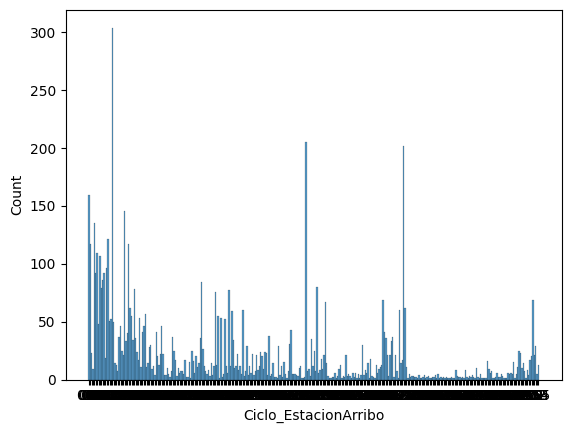

In [13]:
# quick visualization of the number of trips
sns.histplot(data=eret001,x=eret001.Ciclo_EstacionArribo, binwidth=1)

In [14]:
import json

In [15]:
# importing information of the stations
json_filename = 'station_information.json'
with open(json_filename, 'r') as json_file:
    json_data = json_file.read()
try:
    parsed_data = json.loads(json_data)
except json.JSONDecodeError as e:
    print("Error decoding JSON:", e)
    exit(1)

In [16]:
parsed_data

{'last_updated': 1691610930,
 'ttl': 2,
 'data': {'stations': [{'station_id': '5',
    'external_id': '3ea89109-d2f3-46eb-9c41-c43742050340',
    'name': 'CE-407  Prolongación Xochicalco-General Emiliano Zapata',
    'short_name': '407',
    'lat': 19.367209,
    'lon': -99.15872,
    'rental_methods': ['KEY', 'CREDITCARD'],
    'capacity': 19,
    'electric_bike_surcharge_waiver': False,
    'is_charging': False,
    'eightd_has_key_dispenser': False,
    'has_kiosk': True},
   {'station_id': '6',
    'external_id': 'ba78b703-4e5a-44bd-ab2c-1eedc71e11c3',
    'name': 'CE-428  Prolongación Uxmal-Av. Popocatépetl (Eje 8)',
    'short_name': '428',
    'lat': 19.363404,
    'lon': -99.160395,
    'rental_methods': ['KEY', 'CREDITCARD'],
    'capacity': 27,
    'electric_bike_surcharge_waiver': False,
    'is_charging': False,
    'eightd_has_key_dispenser': False,
    'has_kiosk': True},
   {'station_id': '7',
    'external_id': '6563d263-2342-46e3-8983-461e68d2d615',
    'name': 'CE-427

In [17]:
station_name = []

In [18]:
# extracting stations names from the file
for station in parsed_data['data']['stations']:
    station_name.append(station['name'])

In [19]:
station_name

['CE-407  Prolongación Xochicalco-General Emiliano Zapata',
 'CE-428  Prolongación Uxmal-Av. Popocatépetl (Eje 8)',
 'CE-427 Avenida México-Coyoacán-Av. Popocatépetl (Eje',
 'CE-443 Bruno Traven-Golondrinas',
 'CE-423 Moras-José María Rico (Eje 8)',
 'CE-438 Adolfo Prieto-José María Olloqui',
 'CE-415 San Francisco-Parroquia',
 'CE-417 Goya-Augusto Rodin',
 'CE-022 Reforma - Manchester',
 'CE-094 Lic. Verdad-Moneda',
 'CE-405 División Del Norte-Municipio Libre',
 'CE-375 Tenayuca-División Del Norte',
 'CE-394 Dr. Roberto Gayol-Félix Cuevas',
 'CE-337 San Borja-Martín Mendalde',
 'CE-412 Parroquia-Avenida Universidad',
 'CE-381 San Lorenzo-Manzanas',
 'CE-332 Calle 27-Avenida 3',
 'CE-399 Heriberto Frías-San Lorenzo',
 'CE-377 Heriberto Frías-Miguel Laurent',
 'CE-360 Heriberto Frías-Matias Romero',
 'CE-362 Augusto Rodin-Alberto Balderas',
 'CE-365 Holbein-Avenida Revolución',
 'CE-424 Amores-José María Rico (Eje 8)',
 'CE-421 María Luz Bringas-Oso',
 'CE-287 13 de Septiembre-Puente de

In [20]:
parsed_data['data']['stations']

[{'station_id': '5',
  'external_id': '3ea89109-d2f3-46eb-9c41-c43742050340',
  'name': 'CE-407  Prolongación Xochicalco-General Emiliano Zapata',
  'short_name': '407',
  'lat': 19.367209,
  'lon': -99.15872,
  'rental_methods': ['KEY', 'CREDITCARD'],
  'capacity': 19,
  'electric_bike_surcharge_waiver': False,
  'is_charging': False,
  'eightd_has_key_dispenser': False,
  'has_kiosk': True},
 {'station_id': '6',
  'external_id': 'ba78b703-4e5a-44bd-ab2c-1eedc71e11c3',
  'name': 'CE-428  Prolongación Uxmal-Av. Popocatépetl (Eje 8)',
  'short_name': '428',
  'lat': 19.363404,
  'lon': -99.160395,
  'rental_methods': ['KEY', 'CREDITCARD'],
  'capacity': 27,
  'electric_bike_surcharge_waiver': False,
  'is_charging': False,
  'eightd_has_key_dispenser': False,
  'has_kiosk': True},
 {'station_id': '7',
  'external_id': '6563d263-2342-46e3-8983-461e68d2d615',
  'name': 'CE-427 Avenida México-Coyoacán-Av. Popocatépetl (Eje',
  'short_name': '427',
  'lat': 19.364912,
  'lon': -99.162968,
 

In [21]:
# transforming to DataFrame
df = pd.DataFrame(parsed_data['data']['stations'])

In [22]:
df.head()

,station_id,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk
0,5,3ea89109-d2f3-46eb-9c41-c43742050340,CE-407 Prolongación Xochicalco-General Emilia...,407,19.367209,-99.158720,"[KEY, CREDITCARD]",19,False,False,False,True
1,6,ba78b703-4e5a-44bd-ab2c-1eedc71e11c3,CE-428 Prolongación Uxmal-Av. Popocatépetl (E...,428,19.363404,-99.160395,"[KEY, CREDITCARD]",27,False,False,False,True
2,7,6563d263-2342-46e3-8983-461e68d2d615,CE-427 Avenida México-Coyoacán-Av. Popocatépet...,427,19.364912,-99.162968,"[KEY, CREDITCARD]",19,False,False,False,True
3,8,ec55e597-c8fc-4e86-bcfe-b0e81a494790,CE-443 Bruno Traven-Golondrinas,443,19.359583,-99.162085,"[KEY, CREDITCARD]",31,False,False,False,True
4,9,a98c7fac-12ce-4895-923b-6b39f04721ca,CE-423 Moras-José María Rico (Eje 8),423,19.367816,-99.175269,"[KEY, CREDITCARD]",23,False,False,False,True


In [23]:
# erase "#" in the line below to export as csv file

#df.to_csv('cicloestacaiones.csv', index=False)

In [24]:
# verifying data
df.loc[df.short_name=='271-272']

,station_id,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk
134,141,e23d9a83-4e36-473d-9c7c-c957e308d36c,CE-271-272 Jesús García - Carlos J. Meneses,271-272,19.443684,-99.152465,"[KEY, CREDITCARD]",55,False,False,False,True


In [25]:
#defining columns to be dropped
columns = ['external_id', 'rental_methods','capacity','electric_bike_surcharge_waiver','is_charging','eightd_has_key_dispenser','has_kiosk']

stations_ids_coord = df.copy()

In [26]:
# dropping columns
stations_ids_coord.drop(columns, inplace=True, axis=1)

In [28]:
stations_ids_coord

,station_id,name,short_name,lat,lon
0,5,CE-407 Prolongación Xochicalco-General Emilia...,407,19.367209,-99.158720
1,6,CE-428 Prolongación Uxmal-Av. Popocatépetl (E...,428,19.363404,-99.160395
2,7,CE-427 Avenida México-Coyoacán-Av. Popocatépet...,427,19.364912,-99.162968
3,8,CE-443 Bruno Traven-Golondrinas,443,19.359583,-99.162085
4,9,CE-423 Moras-José María Rico (Eje 8),423,19.367816,-99.175269
...,...,...,...,...,...
486,498,CE-704 Pacífico - Asia,704,19.344976,-99.157824
487,499,CE-709 Inglaterra - Antigua Taxqueña,709,19.344271,-99.149973
488,500,CE-706 Canadá - Acolotitla,706,19.347503,-99.152440
489,501,CE-702 Fernández Leal - Plaza de la Conchita,702,19.347246,-99.158570


In [29]:
statns_coord = stations_ids_coord.copy()

In [30]:
#defining columns to be dropped
clmns = ['station_id','name']

# dropping columns
statns_coord.drop(clmns, inplace=True, axis=1)

In [31]:
statns_coord.head()

,short_name,lat,lon
0,407,19.367209,-99.158720
1,428,19.363404,-99.160395
2,427,19.364912,-99.162968
3,443,19.359583,-99.162085
4,423,19.367816,-99.175269


In [32]:
est_est = data.copy()

In [33]:
#defining columns to be dropped
cols = ['Genero_Usuario', 'Edad_Usuario','Fecha_Retiro','Hora_Retiro','Fecha Arribo','Hora_Arribo']

# dropping columns
est_est.drop(cols, inplace=True, axis=1)

In [34]:
# renaming column
est_est.rename(columns={"Ciclo_Estacion_Retiro": "short_name"}, inplace=True)

In [35]:
est_est

,Bici,short_name,Ciclo_EstacionArribo
0,7689680,409,372
1,4491841,409,372
2,8475519,078,170
3,8584393,054,020
4,6810659,196,064
...,...,...,...
945158,3319944,068,017
945159,6395594,141,157
945160,2152262,167,167
945161,6059604,359,375


In [36]:
# merging trips info with depart stations coordinates info
merge1 = pd.merge(est_est, statns_coord, how='left', on='short_name')

In [37]:
# renaming columns
merge1.rename(columns={"lat": "lat_retiro","lon": "lon_retiro"}, inplace=True)

In [38]:
new_col_ord1 = ["Bici", "short_name", "lat_retiro",'lon_retiro','Ciclo_EstacionArribo']
merge1 = merge1[new_col_ord1]

In [39]:
merge1.rename(columns={"short_name": "estacion_retiro","Ciclo_EstacionArribo": "short_name"}, inplace=True)

In [40]:
merge1

,Bici,estacion_retiro,lat_retiro,lon_retiro,short_name
0,7689680,409,19.365125,-99.155477,372
1,4491841,409,19.365125,-99.155477,372
2,8475519,078,19.407512,-99.177361,170
3,8584393,054,19.416163,-99.170795,020
4,6810659,196,19.438349,-99.192904,064
...,...,...,...,...,...
945158,3319944,068,19.411771,-99.173783,017
945159,6395594,141,19.415905,-99.159540,157
945160,2152262,167,19.404651,-99.179375,167
945161,6059604,359,19.379331,-99.161163,375


In [41]:
# merging with arrive stations coordinates info
merge2 = pd.merge(merge1, statns_coord, how='left', on='short_name')

In [42]:
# renaming columns
merge2.rename(columns={"short_name": "estacion_arribo","lat": "lat_arribo","lon": "lon_arribo"}, inplace=True)

In [43]:
# sorting by depart stations
merge2.sort_values('estacion_retiro',inplace=True)

In [44]:
ret_arr_sort = merge2.copy()

In [45]:
ret_arr_sort

,Bici,estacion_retiro,lat_retiro,lon_retiro,estacion_arribo,lat_arribo,lon_arribo
289016,2483972,001,19.433478,-99.167790,001,19.433478,-99.167790
739649,7108459,001,19.433478,-99.167790,249,19.429877,-99.177569
314860,6868491,001,19.433478,-99.167790,257,19.433803,-99.166223
675122,6428627,001,19.433478,-99.167790,474,19.438984,-99.177549
85854,2494243,001,19.433478,-99.167790,027,19.429160,-99.162703
...,...,...,...,...,...,...,...
708059,8838906,670,19.367600,-99.184992,333,19.387624,-99.180978
926113,8110918,Kiosco149,NaN,NaN,Kiosco149,NaN,NaN
925325,8110918,Kiosco149,NaN,NaN,Kiosco149,NaN,NaN
925715,8110918,Kiosco149,NaN,NaN,Kiosco149,NaN,NaN


In [46]:
# second criteria to sort: by arrive station
ret_arr_sort.sort_values(['estacion_retiro','estacion_arribo'],inplace=True)

In [47]:
# verifying that the sorting is correct
ret_arr_sort[719300:719310]

,Bici,estacion_retiro,lat_retiro,lon_retiro,estacion_arribo,lat_arribo,lon_arribo
800265,8110918,301,19.393807,-99.171133,546,19.448764,-99.156817
944923,7868540,301,19.393807,-99.171133,667,19.363978,-99.180914
944925,3905643,301,19.393807,-99.171133,667,19.363978,-99.180914
944926,3089042,301,19.393807,-99.171133,667,19.363978,-99.180914
869685,6749246,301,19.393807,-99.171133,667,19.363978,-99.180914
870110,8166399,301,19.393807,-99.171133,668,19.367522,-99.181727
908714,4609467,301,19.393807,-99.171133,668,19.367522,-99.181727
910336,3462587,301,19.393807,-99.171133,670,19.367600,-99.184992
523137,8205957,302,19.393832,-99.171466,003,19.431630,-99.158547
820967,7407273,302,19.393832,-99.171466,003,19.431630,-99.158547


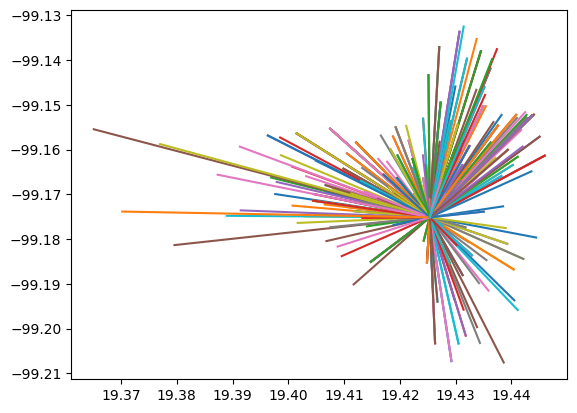

In [48]:
# exploring visualizations of the trips
plt.plot([merge2[20000:20500].lat_retiro,merge2[20000:20500].lat_arribo],[merge2[20000:20500].lon_retiro,merge2[20000:20500].lon_arribo])
plt.show()

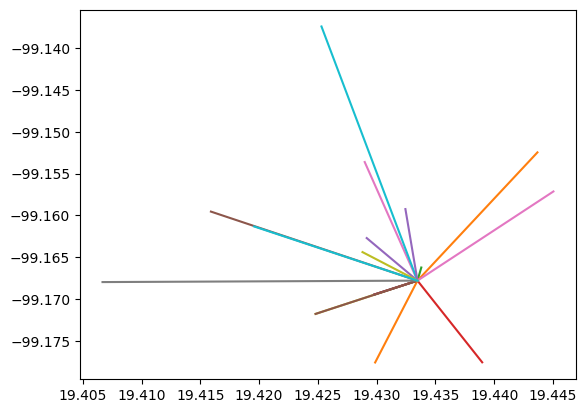

In [49]:
plt.plot([merge2.head(20).lat_retiro,merge2.head(20).lat_arribo],[merge2.head(20).lon_retiro,merge2.head(20).lon_arribo])
plt.show()

In [50]:
# counting trips from specific stations to specific station
sortest = ret_arr_sort.groupby(['estacion_retiro', 'estacion_arribo']).size().reset_index(name='trip_count')

In [51]:
sortest

,estacion_retiro,estacion_arribo,trip_count
0,001,001,159
1,001,002,117
2,001,003,23
3,001,004,9
4,001,005,135
...,...,...,...
113720,670,668,70
113721,670,669,22
113722,670,670,38
113723,Kiosco149,Kiosco149,3


In [52]:
# more than 200 trips were the ones considered as "the most frequent trips"
fltr_trips = sortest[sortest['trip_count'] > 200]


In [53]:
fltr_trips

,estacion_retiro,estacion_arribo,trip_count
17,001,018,304
158,001,174,205
229,001,271-272,202
1578,007,007,316
1813,007,271-272,239
...,...,...,...
107095,465,464,209
107270,466,464,216
107688,468,271-272,222
111133,551,555,224


In [54]:
# In this case, it is needed to know only the route between two stations.
# In case there are more than 200 trips from station "A" to station "B" 
# and also more than 200 trips from station "B" to station "A", 
# only the first route to apper will be kept.
no_dupls = fltr_trips.copy()
no_dupls['routes'] = no_dupls.apply(lambda row: ''.join(sorted([row['estacion_retiro'], row['estacion_arribo']])), axis=1)
no_dupls

,estacion_retiro,estacion_arribo,trip_count,routes
17,001,018,304,001018
158,001,174,205,001174
229,001,271-272,202,001271-272
1578,007,007,316,007007
1813,007,271-272,239,007271-272
...,...,...,...,...
107095,465,464,209,464465
107270,466,464,216,464466
107688,468,271-272,222,271-272468
111133,551,555,224,551555


In [55]:
# dropping duplicates
unique_routes_df = no_dupls.drop_duplicates(subset='routes', keep='first').reset_index()
unique_routes_df

,index,estacion_retiro,estacion_arribo,trip_count,routes
0,17,001,018,304,001018
1,158,001,174,205,001174
2,229,001,271-272,202,001271-272
3,1578,007,007,316,007007
4,1813,007,271-272,239,007271-272
5,2703,010,271-272,265,010271-272
6,3902,014,271-272,220,014271-272
7,4263,015,271-272,325,015271-272
8,4613,016,271-272,236,016271-272
9,4960,017,271-272,389,017271-272


In [56]:
#merge1 = pd.merge(est_est, statns_coord, how='left', on='short_name')
#merged_df = pd.merge(df1, df2, left_on=['start_point1', 'finish_point1'], right_on=['start_point2', 'finish_point2'])
fltr_trips_coords1 = pd.merge(fltr_trips,statns_coord,left_on='estacion_retiro',right_on='short_name')

In [57]:
fltr_trips_coords1.drop(columns=['short_name'],inplace=True)
fltr_trips_coords1.rename(columns={"lat": "lat_retiro","lon": "lon_retiro"}, inplace=True)
new_col_ftc1 = ['estacion_retiro', 'lat_retiro','lon_retiro','estacion_arribo','trip_count']
fltr_trips_coords1 = fltr_trips_coords1[new_col_ftc1]
fltr_trips_coords1

,estacion_retiro,lat_retiro,lon_retiro,estacion_arribo,trip_count
0,001,19.433478,-99.167790,018,304
1,001,19.433478,-99.167790,174,205
2,001,19.433478,-99.167790,271-272,202
3,007,19.425355,-99.175150,007,316
4,007,19.425355,-99.175150,271-272,239
...,...,...,...,...,...
59,465,19.445039,-99.194078,464,209
60,466,19.442690,-99.190830,464,216
61,468,19.437260,-99.179624,271-272,222
62,551,19.443581,-99.164883,555,224


In [58]:
fltr_trips_coords2 = pd.merge(fltr_trips_coords1,statns_coord,left_on='estacion_arribo',right_on='short_name')

In [59]:
fltr_trips_coords2

,estacion_retiro,lat_retiro,lon_retiro,estacion_arribo,trip_count,short_name,lat,lon
0,001,19.433478,-99.167790,018,304,018,19.428802,-99.164381
1,271-272,19.443684,-99.152465,018,273,018,19.428802,-99.164381
2,001,19.433478,-99.167790,174,205,174,19.441114,-99.161636
3,085,19.434059,-99.162438,174,222,174,19.441114,-99.161636
4,111,19.438197,-99.165918,174,381,174,19.441114,-99.161636
...,...,...,...,...,...,...,...,...
59,405,19.370556,-99.156667,405,302,405,19.370556,-99.156667
60,465,19.445039,-99.194078,464,209,464,19.442421,-99.199838
61,466,19.442690,-99.190830,464,216,464,19.442421,-99.199838
62,551,19.443581,-99.164883,555,224,555,19.440216,-99.156168


In [60]:
# dropping one column no longer needed
fltr_trips_coords2.drop(columns=['short_name'],inplace=True)

#renaming columns
fltr_trips_coords2.rename(columns={"lat": "lat_arribo","lon": "lon_arribo"}, inplace=True)
new_col_ftc2 = ['estacion_retiro', 'lat_retiro','lon_retiro','estacion_arribo', 'lat_arribo','lon_arribo','trip_count']
fltr_trips_coords2 = fltr_trips_coords2[new_col_ftc2]
fltr_trips_coords2

,estacion_retiro,lat_retiro,lon_retiro,estacion_arribo,lat_arribo,lon_arribo,trip_count
0,001,19.433478,-99.167790,018,19.428802,-99.164381,304
1,271-272,19.443684,-99.152465,018,19.428802,-99.164381,273
2,001,19.433478,-99.167790,174,19.441114,-99.161636,205
3,085,19.434059,-99.162438,174,19.441114,-99.161636,222
4,111,19.438197,-99.165918,174,19.441114,-99.161636,381
...,...,...,...,...,...,...,...
59,405,19.370556,-99.156667,405,19.370556,-99.156667,302
60,465,19.445039,-99.194078,464,19.442421,-99.199838,209
61,466,19.442690,-99.190830,464,19.442421,-99.199838,216
62,551,19.443581,-99.164883,555,19.440216,-99.156168,224


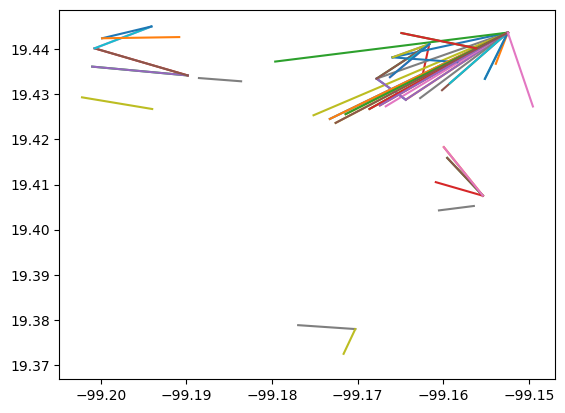

In [61]:
# plotting the routes
plt.plot([fltr_trips_coords2.lon_retiro,fltr_trips_coords2.lon_arribo],[fltr_trips_coords2.lat_retiro,fltr_trips_coords2.lat_arribo])
plt.show()

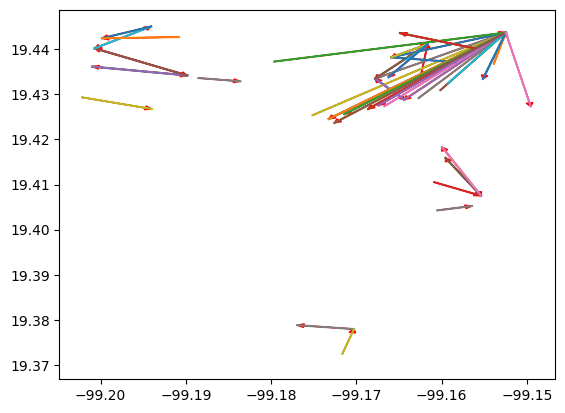

In [62]:
# adding direction to the routes

plt.figure()

# Loop through the DataFrame rows and plot lines with arrow tips
for index, row in fltr_trips_coords2[:].iterrows():
    start_point = (row['lon_retiro'], row['lat_retiro'])
    finish_point = (row['lon_arribo'], row['lat_arribo'])
    
    plt.plot([start_point[0], finish_point[0]], [start_point[1], finish_point[1]])
    
    direction = (finish_point[0] - start_point[0], finish_point[1] - start_point[1])
    #plt.arrow(start_point[0], start_point[1], direction[0], direction[1], head_width=0.002, head_length=0.003, fc='none', ec='red')
    plt.arrow(start_point[0], start_point[1], direction[0], direction[1], width=0.000000001,head_width=0.0008, head_length=0.0008, fc='red', ec='red',length_includes_head=True)

# Show the plot
plt.show()

In [63]:
import folium 
from IPython.display import display
import ipywidgets as widgets
from folium import plugins

In [75]:
# plotting final map

m = folium.Map(location=[19.41, -99.17], zoom_start=13)#, tiles= 'Stamen Terrain')

# Loop through the DataFrame rows and add arrowed lines to the map
for index, row in fltr_trips_coords2[:].iterrows():
    start_point = (row['lat_retiro'], row['lon_retiro'])
    finish_point = (row['lat_arribo'], row['lon_arribo'])
    
    # Create a PolyLine with an arrow marker
    arrowed_line = plugins.AntPath(locations=[start_point, finish_point], color='blue', dash_array=[10, 20],
                                   head_angle=30, head_size=0.4, arrow_color='red')
    arrowed_line.add_to(m)

In [76]:
m

In [77]:
# erase "#" in the line below to export the map as html file

# m.save('ecobici_flow_map.html')

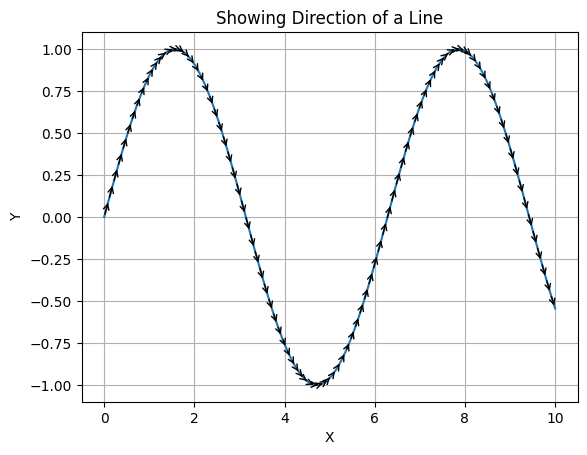

In [67]:
# these are some notes about showing the direction of a line

import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Calculate direction vectors
dx = np.diff(x)
dy = np.diff(y)
directions = np.arctan2(dy, dx)

# Create the plot
plt.plot(x, y)

# Add arrows along the line to show direction
for i in range(len(x) - 1):
    plt.annotate('', xy=(x[i+1], y[i+1]), xytext=(x[i], y[i]),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Showing Direction of a Line')
plt.grid(True)
plt.show()

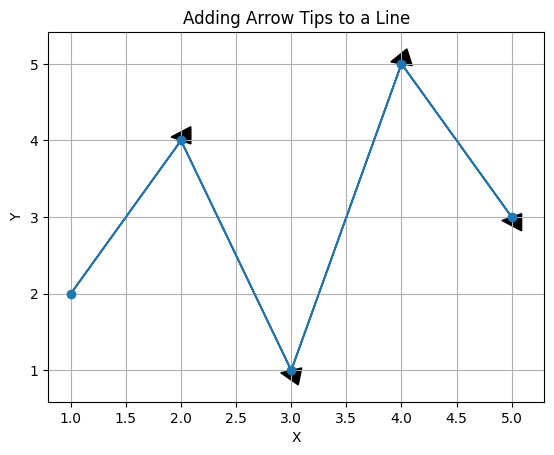

In [68]:
# these are some notes about adding arrow tips to lines

# Generate some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 1, 5, 3])

# Create the plot
plt.plot(x, y, marker='o')

# Adding arrow tips to the line
for i in range(len(x) - 1):
    dx = x[i+1] - x[i]
    dy = y[i+1] - y[i]
    plt.arrow(x[i], y[i], dx, dy, head_width=0.2, head_length=0.2, fc='black', ec='black')

# Show the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Adding Arrow Tips to a Line')
plt.grid(True)
plt.show()